# Customer Analysis

## Analisis Recency, Frequency, Monetary (RFM) untuk melakukan segmentasi customer

Analisis Recency, Frequency, Monetary (RFM) merupakan proses analisis perilaku pelanggan. Dalam menentukan segmentasi pelanggan, digunakan model RFM berdasarkan tiga variabel yaitu recency terakhir melakukan transaksi, frequency dari transaksi, dan monetary dari jumlah transaksi setiap pelanggan.

Menurut Tsiptsis dan Chorianopoulos (2009), analisis RFM terdiri Recency, Frequency, Monetary yang memiliki pengertian sebagai berikut :
1. **Recency**
merupakan variabel untuk mengukur nilai pelanggan berdasarkan rentang waktu (tanggal, bulan, tahun)
transaksi terakhir pelanggan sampai saat ini. Semakin kecil rentang waktu maka nilai recency semakin besar.
2. **Frequency**
merupakan variabel untuk mengukur nilai pelanggan berdasarkan jumlah transaksi yang dilakukan pelanggan
dalam satu periode. Semakin banyak jumlah transaksi yang dilakukan maka nilai frequency semakin besar.
3. **Monetary**
merupakan variabel untuk mengukur nilai pelanggan berdasarkan jumlah besaran uang yang dikeluarkan
pelanggan dalam satu periode. Semakin banyak jumlah besaran uang yang dikeluarkan pelanggan maka nilai Monetary semakin besar. 

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

## Import Dataset

Dataset diperoleh dari hasil querry pada database Northwind sebagai berikut.

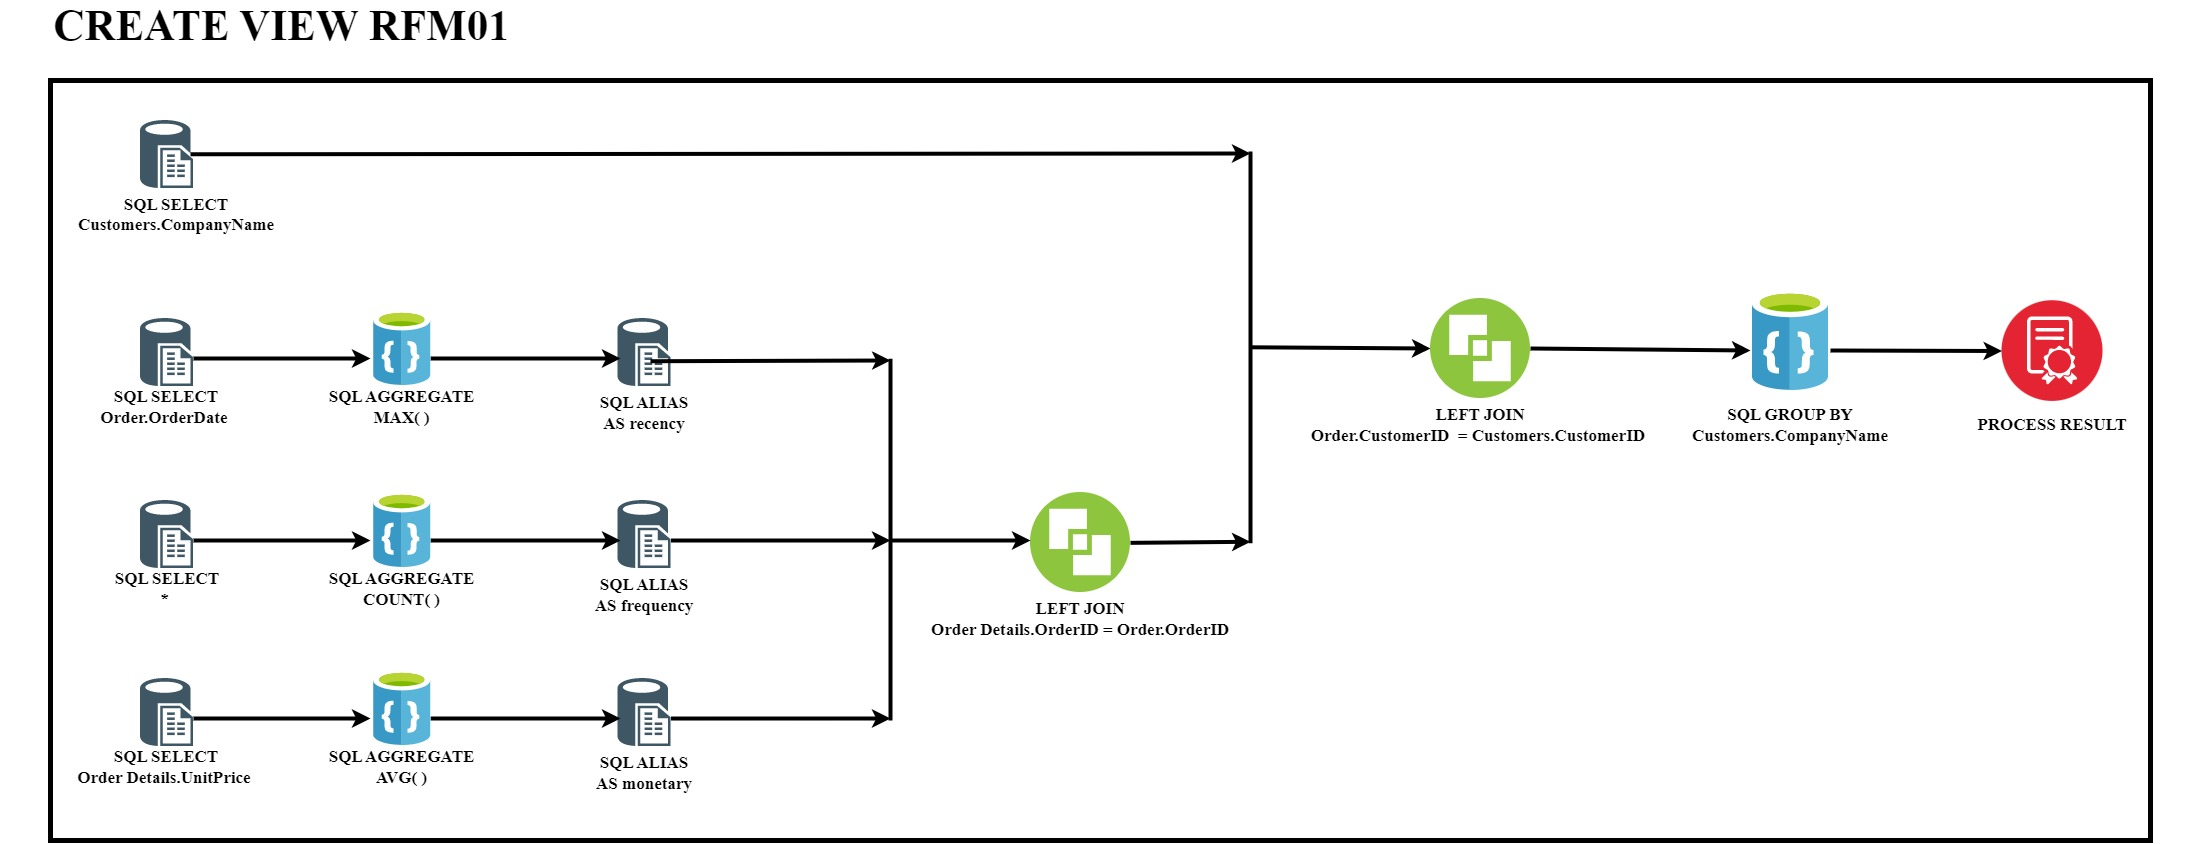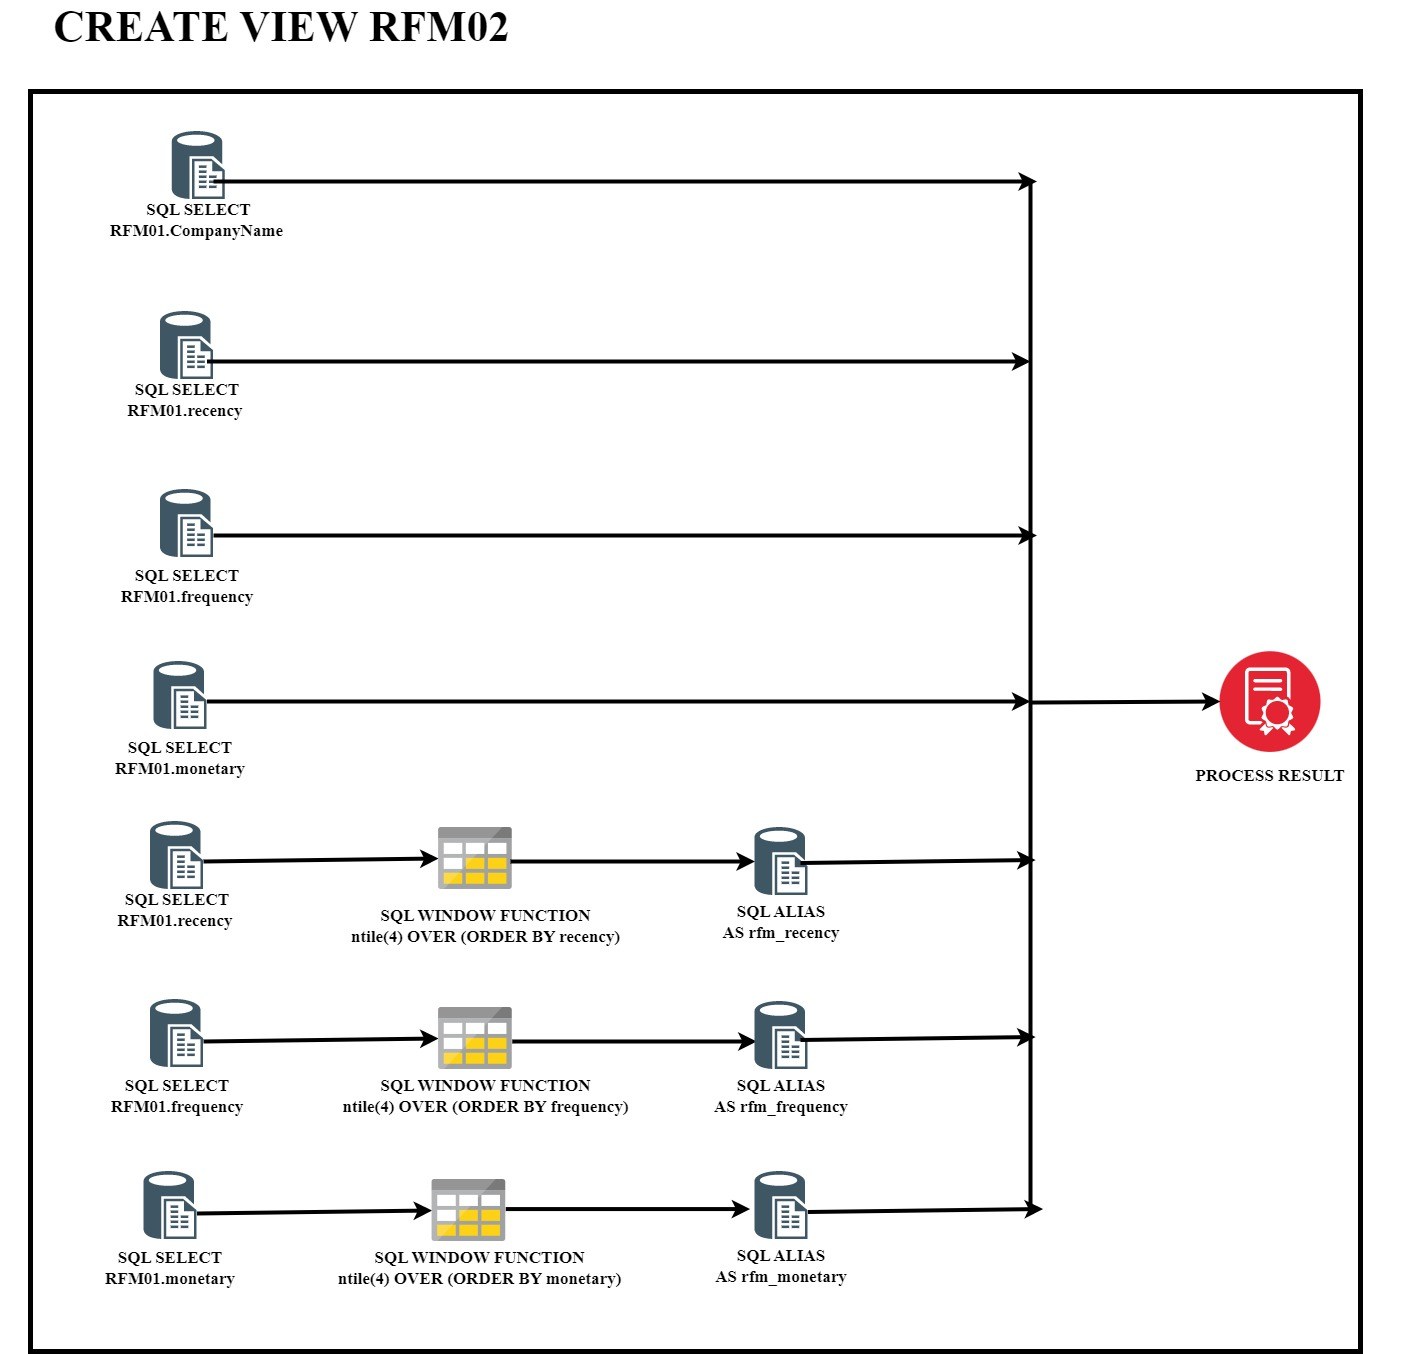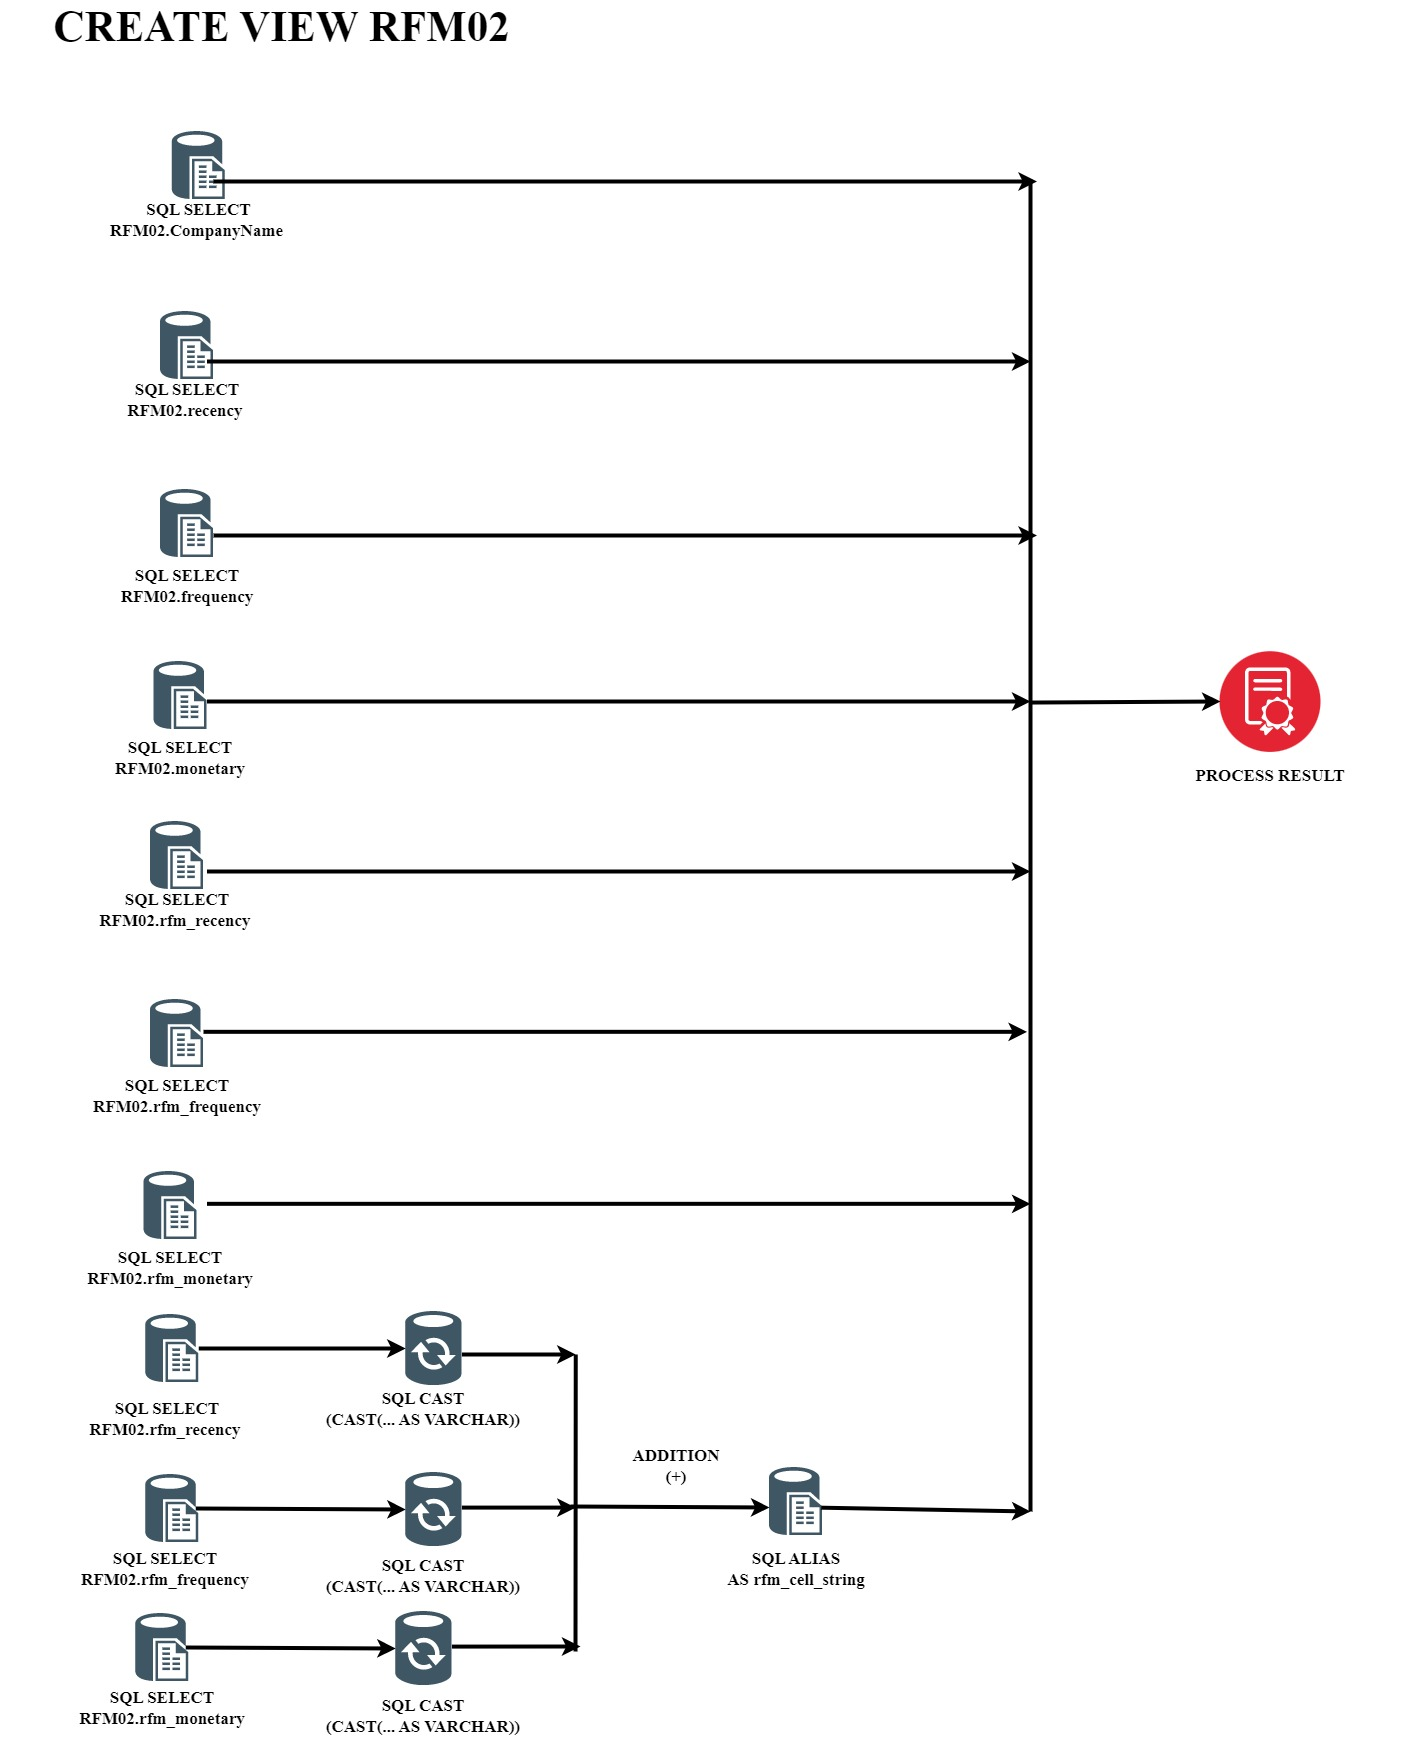

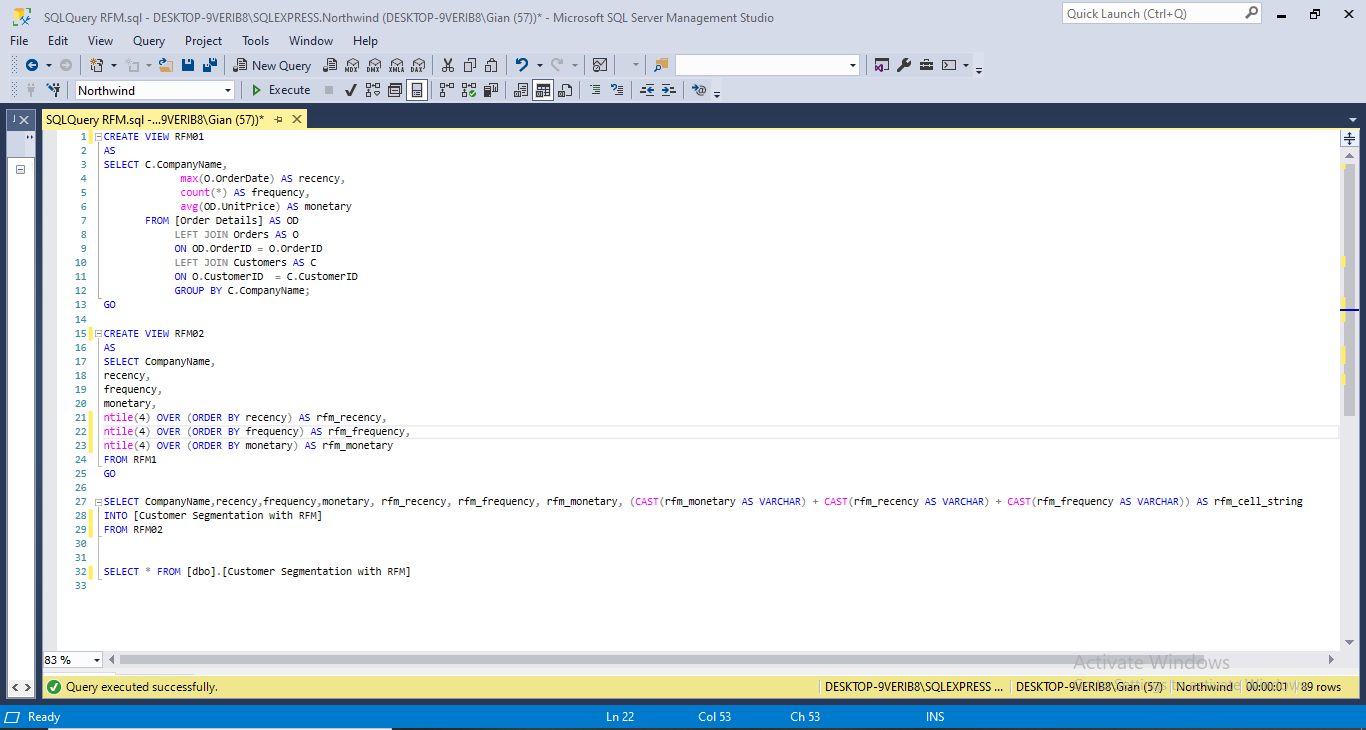

Cara paling sederhana untuk menentukan nilai RFM adalah dengan menggunakan 4 nilai quartil yaitu: 25%, 50%, 75%, dan 100%. Nilai RFM ditulis dalam rentang 1 sampai 4. Final Score RFM dihitung dengan menggabungkan dari masing masing angka R,F, dan M.


In [2]:
df1 = pd.read_csv("RFM Table.csv",encoding="latin-1", sep=';')
df1

,CompanyName,recency,frequency,monetary,rfm_recency,rfm_frequency,rfm_monetary,rfm_cell_string
0,Laughing Bacchus Wine Cellars,01/01/1998 00:00,8,"8,975",1,1,1,111
1,Familia Arquibaldo,31/10/1997 00:00,19,"12,9021",1,2,1,112
2,Centro comercial Moctezuma,18/07/1996 00:00,2,"14,4",1,1,1,111
3,Toms Spezialitäten,23/03/1998 00:00,14,"15,175",2,2,1,122
4,Romero y tomillo,09/04/1998 00:00,14,"15,6635",2,2,1,122
...,...,...,...,...,...,...,...,...
84,France restauration,24/03/1998 00:00,6,"47,0983",2,1,4,421
85,Rancho grande,13/04/1998 00:00,12,"48,0458",2,2,4,422
86,Great Lakes Food Market,30/04/1998 00:00,22,"49,6154",4,3,4,443
87,The Big Cheese,01/04/1998 00:00,7,"57,9928",2,1,4,421


## Customer Segmentation

Pada Segmentasi customer ini terdiri dari 5 kategori, yaitu:
1. **Loyal**
adalah customer terbaik dengan nilai RFM yang tinggi yaitu 433, 434, 443,dan 444
2. **Active**
adalah kategori customer yang sering membeli dan dalam waktu terbaru namun dengan nominal yang kecil dengan nilai RFM, yaitu 323, 333, 321, 422, 421, 332,dan 432
3. **Potential Churners**
adalah kategori customer yang sudah mulai jarang melakukan transaksi dan transaksi terakhir sudah lama dilakukan dengan nilai RFM yaitu, 222, 223, 233,dan 322
4. **New Customers**
adalah kategori customer yang sudah mulai sering melakukan pembelian transaksi dengan nilai RFM yaitu, 311, 411,dan 331
5. **Big Spenders**
adalah kategori customer yang menghabiskan banyak uang dalam melakukan transaksi walaupun dengen frekuensi yang jarang dengan nilai RFM yaitu, 133, 134, 143, 244, 334, 343, 344,dan 144
5. **Lost Customers**
adalah kategori customer yang sudah mulai jarang melakukan transaksi, transaksi terakhir sudah lama dilakukan, dan nonimal yang dikeluarkan sudah sedikit dengan nilai RFM yaitu, 111, 112, 113, 121, 122, 123, 132, 211, 212, 114,dan 141

In [3]:
Customer_Segment = {433 : "Loyal",
                    434 : "Loyal",
                    442 : "Loyal",
                    443 : "Loyal",
                    444 : "Loyal",
                    323 : "Active",
                    333 : "Active",
                    321 : "Active",
                    422 : "Active",
                    421 : "Active",
                    332 : "Active",
                    322 : "Active",
                    342 : "Active",
                    432 : "Active",
                    431 : "Active",
                    222 : "Potential Churners",
                    223 : "Potential Churners",
                    224 : "Potential Churners",
                    233 : "Potential Churners",
                    234 : "Potential Churners",
                    241 : "Potential Churners",
                    242 : "Potential Churners",
                    243 : "Potential Churners",
                    311 : "New Customers",
                    312 : "New Customers",
                    314 : "New Customers",
                    411 : "New Customers",
                    412 : "New Customers",
                    413 : "New Customers",
                    423 : "New Customers",
                    331 : "New Customers",
                    124 : "Big Spenders",
                    133 : "Big Spenders",
                    134 : "Big Spenders",
                    143 : "Big Spenders",
                    244 : "Big Spenders",
                    334 : "Big Spenders",
                    343 : "Big Spenders",
                    344 : "Big Spenders",
                    144 : "Big Spenders",
                    111 : "Lost Customers",
                    112 : "Lost Customers",
                    113 : "Lost Customers",
                    121 : "Lost Customers",
                    122 : "Lost Customers",
                    123 : "Lost Customers",
                    132 : "Lost Customers",
                    211 : "Lost Customers",
                    212 : "Lost Customers",
                    213 : "Lost Customers",
                    114 : "Lost Customers",
                    141 : "Lost Customers"}

In [4]:
df1['Customer_Segment'] = df1['rfm_cell_string'].map(Customer_Segment)
df1

,CompanyName,recency,frequency,monetary,rfm_recency,rfm_frequency,rfm_monetary,rfm_cell_string,Customer_Segment
0,Laughing Bacchus Wine Cellars,01/01/1998 00:00,8,"8,975",1,1,1,111,Lost Customers
1,Familia Arquibaldo,31/10/1997 00:00,19,"12,9021",1,2,1,112,Lost Customers
2,Centro comercial Moctezuma,18/07/1996 00:00,2,"14,4",1,1,1,111,Lost Customers
3,Toms Spezialitäten,23/03/1998 00:00,14,"15,175",2,2,1,122,Lost Customers
4,Romero y tomillo,09/04/1998 00:00,14,"15,6635",2,2,1,122,Lost Customers
...,...,...,...,...,...,...,...,...,...
84,France restauration,24/03/1998 00:00,6,"47,0983",2,1,4,421,Active
85,Rancho grande,13/04/1998 00:00,12,"48,0458",2,2,4,422,Active
86,Great Lakes Food Market,30/04/1998 00:00,22,"49,6154",4,3,4,443,Loyal
87,The Big Cheese,01/04/1998 00:00,7,"57,9928",2,1,4,421,Active


In [5]:
df1.groupby('Customer_Segment').agg('count')

,CompanyName,recency,frequency,monetary,rfm_recency,rfm_frequency,rfm_monetary,rfm_cell_string
Customer_Segment,,,,,,,,
Active,20,20,20,20,20,20,20,20
Big Spenders,14,14,14,14,14,14,14,14
Lost Customers,23,23,23,23,23,23,23,23
Loyal,9,9,9,9,9,9,9,9
New Customers,10,10,10,10,10,10,10,10
Potential Churners,13,13,13,13,13,13,13,13


In [6]:
rfm_agg = df1.groupby('Customer_Segment').agg({
    'CompanyName': 'count'})
rfm_agg.columns = ['Total_Company']
rfm_agg['Percent'] = round((rfm_agg['Total_Company']/rfm_agg['Total_Company'].sum())*100, 2)

rfm_agg = rfm_agg.reset_index()

rfm_agg

,Customer_Segment,Total_Company,Percent
0,Active,20,22.47
1,Big Spenders,14,15.73
2,Lost Customers,23,25.84
3,Loyal,9,10.11
4,New Customers,10,11.24
5,Potential Churners,13,14.61


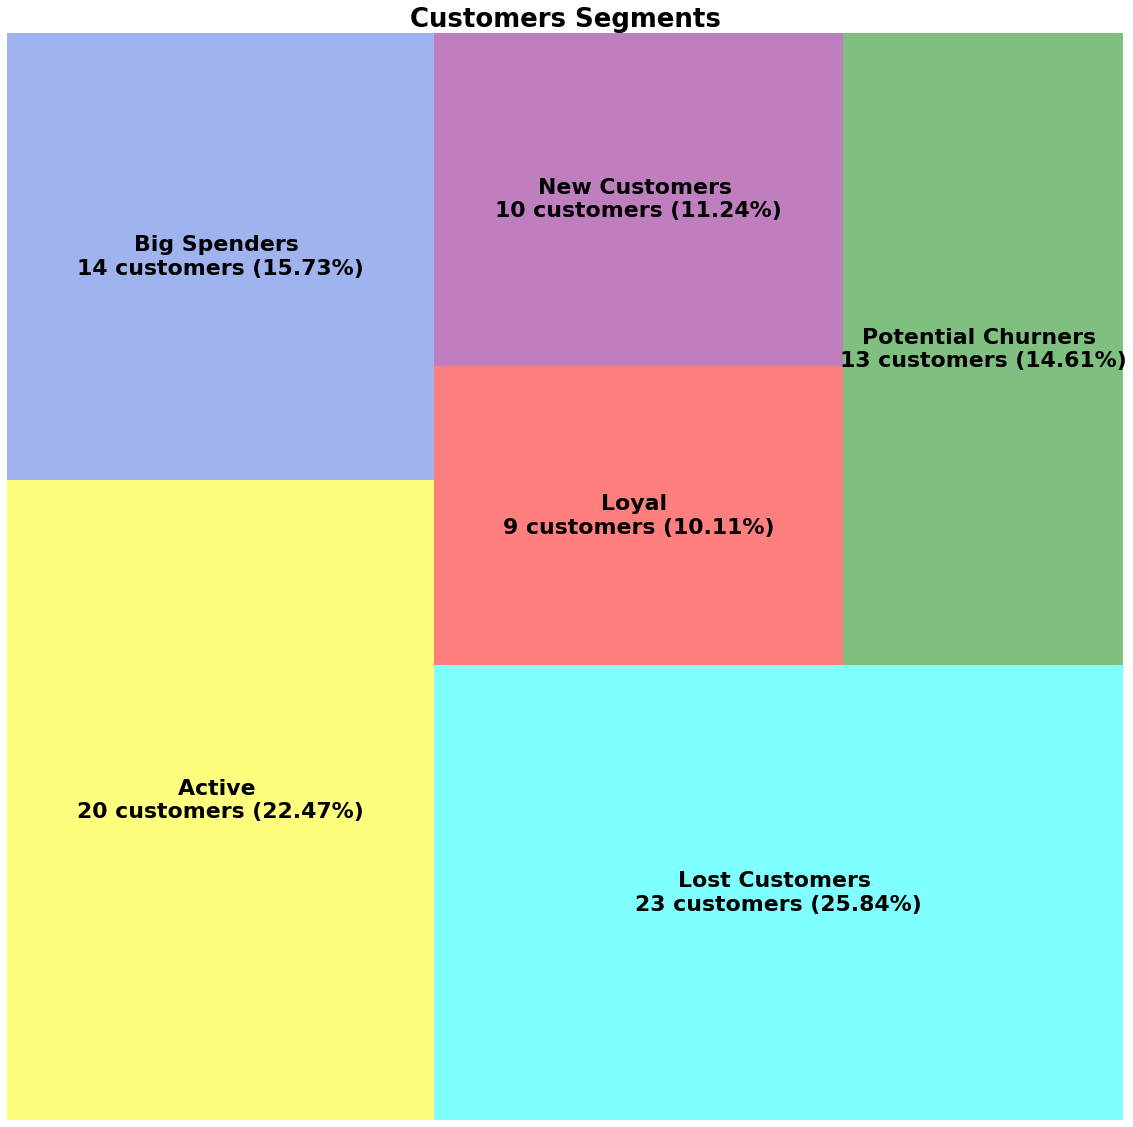

In [7]:
plt.figure(figsize=(20,20))

colors_dict = {'Loyal':'yellow',
               'Active':'royalblue',
               'Potential Churners':'cyan',
               'New Customers':'red', 
               'Big Spenders':'purple', 
               'Lost Customers':'green'}

squarify.plot(sizes=rfm_agg['Total_Company'],
              text_kwargs={'fontsize':22,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

## Kesimpulan

Berdasarkan grafik Customers Segments diatas dapat dilihat hanya ada 10,11% customer yang loyal, sehingga perlu dilakukan beberapa rekomendasi perlakuan khusus untuk beberapa kagetori customer sebagai berikut:

1. **Loyal** : Lakukan pemberian reward dan meminta mereka untuk melakukan review untuk barang yang telah mereka beli sehingga dapat meningkatkan revenue untuk perusahaan.
2. **Active** : Lakukan penawaran produk dengan value yang tinggi, meminta mereka melakukan review dan merekomendasikan produk perusahaan kepada lingkungannya
3. **Potential Churners** : lakukan penawaran membership, beri diskon, dan rekomendasikan produk lain yang dapat membuat customer tesebut tertarik
4. **New Customers** : Lakukan post-sale support dan buat relasi dengan customer tersebut
5. **Big Spenders** : Lakukan pembangun relasi baru dengan customer lewat email dan beri rekomendasi produk yang sedang diskon
6. **Lost Customers** : Lakukan campaign baru agar dapat mengambil interest kembali dari customer

